## 그룹화 (Cluster)
- 비지도 학습 : label 없는 dataset
- 

## 데이터 수집

In [21]:
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
import seaborn as sns
import pandas as pd
import numpy as np 
import scipy.stats as stats
from sklearn import datasets 
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.base import clone
from copy import deepcopy
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

import lightgbm as lgb

In [22]:
import matplotlib.font_manager as fm
# 폰트 캐시 삭제 및 재생성
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
fm._load_fontmanager(try_read_cache=False)

# 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = font_prop.get_name()
mpl.rcParams['axes.unicode_minus'] = False

In [23]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
# iris_dataset

## 데이터 분석

## 데이터 전처리 

In [24]:
features = iris_dataset['data']
features[:4]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

In [25]:
iris_dataset['target'], iris_dataset['feature_names']

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

### 차원 축소 
- PCA
- 과정 : 공분산 행렬 찾기 -> 고유값(Eigenvalue), 고유벡터(Eigenvector) -> 주성분 찾기 -> 데이터 변환
- 활용도
    + 데이터 시각화
    + 잡음 제거 
    + 특징 추출
    + 추천 시스템 (LDA 검색어 챗봇)

In [37]:
from sklearn.decomposition import PCA

dim_reduction_PCA = PCA(n_components=2) # 줄일 목표차원의 차원수 2차원으로 축소

In [38]:
feature_pca = dim_reduction_PCA.fit_transform(X=features)

In [39]:
features.shape, feature_pca.shape

((150, 4), (150, 2))

In [40]:
# 각 벡터의 성분 설명률?, 주성분
dim_reduction_PCA.explained_variance_ratio_, dim_reduction_PCA.explained_variance_ # 92% vs 5%

(array([0.92461872, 0.05306648]), array([4.22824171, 0.24267075]))

## 데이터 분할

## 모델 학습 

### 찾은 갯수로 학습 

In [43]:
from sklearn.cluster import KMeans
# 중앙점 갯수 (카테고리 갯수) 지정
category_num = 3
model_kmeans = KMeans(n_clusters=category_num)
model_kmeans.fit(X=feature_pca)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

## 모델 평가 

In [47]:
# features row별 model이 predict한 label 값들
model_kmeans.labels_, np.unique(model_kmeans.labels_), model_kmeans.n_features_in_

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
        2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
        2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32),
 array([0, 1, 2], dtype=int32),
 2)

In [48]:
# 각 카테고리별 중앙 벡터 확인
model_kmeans.cluster_centers_, model_kmeans.cluster_centers_.shape

(array([[-2.64241546,  0.19088505],
        [ 0.66567601, -0.3316042 ],
        [ 2.34652659,  0.27393856]]),
 (3, 2))

/tmp/ipykernel_27443/895027359.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x=model_kmeans.cluster_centers_[:,0], y=model_kmeans.cluster_centers_[:,1], cmap='blue')


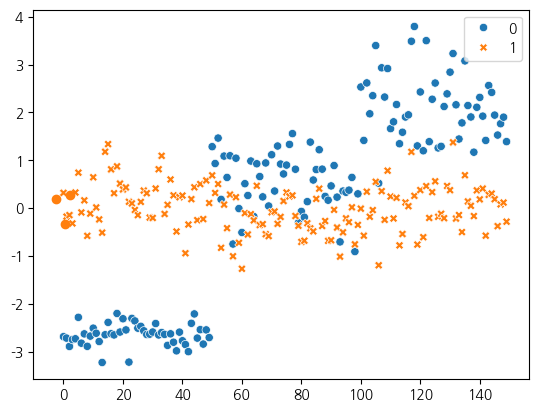

In [55]:
sns.scatterplot(feature_pca)
plt.scatter(x=model_kmeans.cluster_centers_[:,0], y=model_kmeans.cluster_centers_[:,1], cmap='blue')
plt.show()

/tmp/ipykernel_27443/2181108804.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x=model_kmeans.cluster_centers_[:,0], y=model_kmeans.cluster_centers_[:,1], cmap='blue')


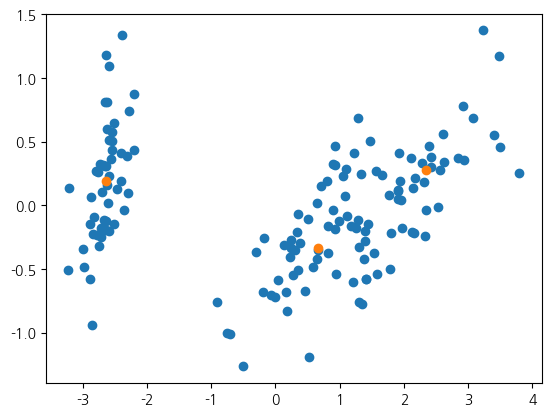

In [56]:
plt.scatter(x=feature_pca[:,0], y=feature_pca[:,1]) # 차원 축소 데이터
plt.scatter(x=model_kmeans.cluster_centers_[:,0], y=model_kmeans.cluster_centers_[:,1], cmap='blue') # 차원 축소 중심값 
plt.show()

## 모델 배포